In [1]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [2]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [2]:
conn=db.get_conn()
data_original=pd.read_sql(sql="select * from _201904 where monthly_salary>0 and monthly_salary<80000", con=conn)
conn.close()

In [3]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [4]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [5]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}

translate_dict={}
translate_dict['beijing']='北京'
translate_dict['shanghai']='上海'
translate_dict['shenzhen']='深圳'
translate_dict['hangzhou']='杭州'
translate_dict['guangzhou']='广州'
translate_dict['nanjing']='南京'
translate_dict['chengdu']='成都'
translate_dict['dongguan']='东莞'
translate_dict['xian']='西安'
translate_dict['wuhan']='武汉'
translate_dict['tianjin']='天津'
translate_dict['changsha']='长沙'
translate_dict['ningbo']='宁波'
translate_dict['fuzhou']='福州'
translate_dict['dalian']='大连'
translate_dict['chongqing']='重庆'
translate_dict['qingdao']='青岛'
translate_dict['jinan']='济南'
translate_dict['hefei']='合肥'
translate_dict['changchun']='长春'
translate_dict['kunming']='昆明'
translate_dict['zhengzhou']='郑州'
translate_dict['shenyang']='沈阳'
translate_dict['harbin']='哈尔滨'

# 程序员工资

In [6]:
data_city=get_sub_stats_by_col(data,'city')
data_city.city=data_city.city.map(translate_dict)
data_city.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,北京,16834,3750,14000,41667,36970,10.72%
0,上海,16059,5250,14583,35000,58452,16.95%
6,深圳,15763,5250,14000,37500,45981,13.33%
4,杭州,14673,3750,12500,32573,18816,5.46%
5,广州,12652,3750,11500,30000,39472,11.44%
8,南京,12544,3750,12000,29424,19588,5.68%
9,成都,12165,3500,11500,27500,16508,4.79%
16,天津,11592,4500,10000,27500,3063,0.89%
20,东莞,11233,3750,10000,26000,3555,1.03%
1,武汉,11028,3750,10000,25000,19591,5.68%


In [7]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print("2019年4月{0}招收{1}{2}人。2019年4月{0}{1}平均工资{3:.0f}元，工资中位数{4:.0f}元，其中95%的人的工资介于{5:.0f}元到{6:.0f}元。\r\n".format(row[0], career, row[5], row[1], row[3], row[2], row[4]))


In [8]:
describe(data_city,'程序员')

2019年4月北京招收程序员36970人。2019年4月北京程序员平均工资16834元，工资中位数14000元，其中95%的人的工资介于3750元到41667元。

2019年4月上海招收程序员58452人。2019年4月上海程序员平均工资16059元，工资中位数14583元，其中95%的人的工资介于5250元到35000元。

2019年4月深圳招收程序员45981人。2019年4月深圳程序员平均工资15763元，工资中位数14000元，其中95%的人的工资介于5250元到37500元。

2019年4月杭州招收程序员18816人。2019年4月杭州程序员平均工资14673元，工资中位数12500元，其中95%的人的工资介于3750元到32573元。

2019年4月广州招收程序员39472人。2019年4月广州程序员平均工资12652元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2019年4月南京招收程序员19588人。2019年4月南京程序员平均工资12544元，工资中位数12000元，其中95%的人的工资介于3750元到29424元。

2019年4月成都招收程序员16508人。2019年4月成都程序员平均工资12165元，工资中位数11500元，其中95%的人的工资介于3500元到27500元。

2019年4月天津招收程序员3063人。2019年4月天津程序员平均工资11592元，工资中位数10000元，其中95%的人的工资介于4500元到27500元。

2019年4月东莞招收程序员3555人。2019年4月东莞程序员平均工资11233元，工资中位数10000元，其中95%的人的工资介于3750元到26000元。

2019年4月武汉招收程序员19591人。2019年4月武汉程序员平均工资11028元，工资中位数10000元，其中95%的人的工资介于3750元到25000元。

2019年4月西安招收程序员10894人。2019年4月西安程序员平均工资10996元，工资中位数10000元，其中95%的人的工资介于3750元到25812元。

2019年4月宁波招收程序员3427人。2019年4月宁波程序员平均工资10894元，工资中位数9583元，其中95%的人的工资介于3750元到22500元。

2019年4月长

In [10]:
data_location = pd.read_csv('../city_locations.csv')
data_location=data_location.set_index('city')

In [11]:
from mpl_toolkits.basemap import Basemap

In [12]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        city=row[0]
        
        longitude = data_location.loc[city,'longitude']
        latitude = data_location.loc[city,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if city == '杭州':
            x=x-400000
            y=y+10000
        elif city=='广州':
            x=x-400000
            y=y+10000
        elif city=='合肥':
            x=x-300000
            y=y+10000
        elif city=='深圳':
            y=y-100000
        elif city=='南京':
            x=x-100000
        elif city=='天津':
            y=y-50000
        elif city=='上海':
            x=x+50000
        elif city=='武汉':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(city, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(city, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(city, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


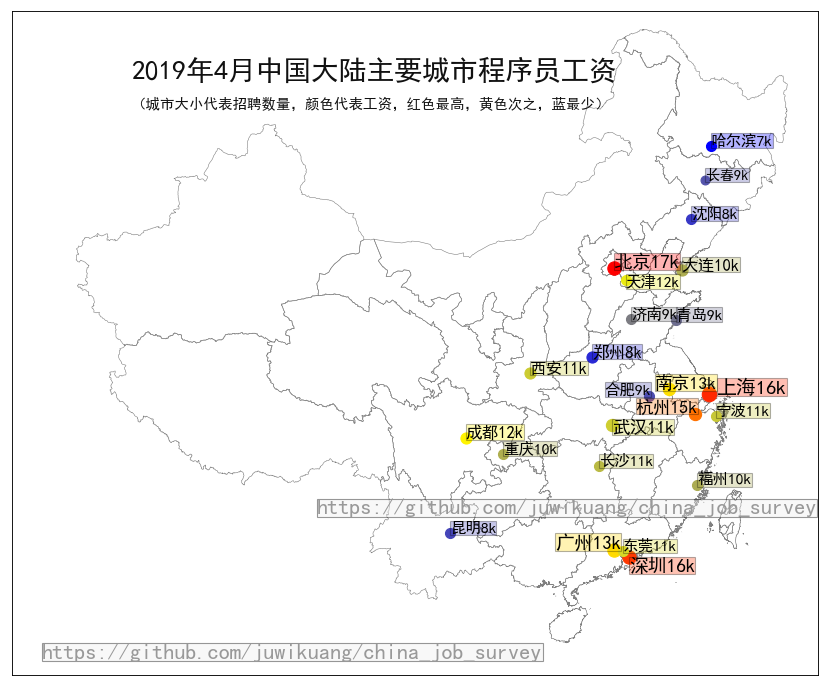

In [13]:
draw_map(data_city,2000,'2019年4月中国大陆主要城市程序员工资')

# 算法工程师

In [14]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'city')
data_city_algorithm.city=data_city_algorithm.city.map(translate_dict)
data_city_algorithm.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,26304,4575,22500,65000,4324,16.06%
4,上海,23039,6500,22500,45000,5139,19.09%
8,深圳,21701,5961,20000,45000,3912,14.53%
2,杭州,19011,3500,17500,40000,2010,7.47%
7,广州,18104,5250,16000,41979,2191,8.14%
5,南京,17964,3750,16500,36800,1636,6.08%
15,成都,16412,6039,15000,31250,1411,5.24%
21,宁波,15527,5525,16095,33250,144,0.53%
16,武汉,15393,4000,14583,34725,1453,5.40%
3,西安,14885,4500,12917,28112,922,3.42%


In [15]:
describe(data_city_algorithm,'算法工程师')

2019年4月北京招收算法工程师4324人。2019年4月北京算法工程师平均工资26304元，工资中位数22500元，其中95%的人的工资介于4575元到65000元。

2019年4月上海招收算法工程师5139人。2019年4月上海算法工程师平均工资23039元，工资中位数22500元，其中95%的人的工资介于6500元到45000元。

2019年4月深圳招收算法工程师3912人。2019年4月深圳算法工程师平均工资21701元，工资中位数20000元，其中95%的人的工资介于5961元到45000元。

2019年4月杭州招收算法工程师2010人。2019年4月杭州算法工程师平均工资19011元，工资中位数17500元，其中95%的人的工资介于3500元到40000元。

2019年4月广州招收算法工程师2191人。2019年4月广州算法工程师平均工资18104元，工资中位数16000元，其中95%的人的工资介于5250元到41979元。

2019年4月南京招收算法工程师1636人。2019年4月南京算法工程师平均工资17964元，工资中位数16500元，其中95%的人的工资介于3750元到36800元。

2019年4月成都招收算法工程师1411人。2019年4月成都算法工程师平均工资16412元，工资中位数15000元，其中95%的人的工资介于6039元到31250元。

2019年4月宁波招收算法工程师144人。2019年4月宁波算法工程师平均工资15527元，工资中位数16095元，其中95%的人的工资介于5525元到33250元。

2019年4月武汉招收算法工程师1453人。2019年4月武汉算法工程师平均工资15393元，工资中位数14583元，其中95%的人的工资介于4000元到34725元。

2019年4月西安招收算法工程师922人。2019年4月西安算法工程师平均工资14885元，工资中位数12917元，其中95%的人的工资介于4500元到28112元。

2019年4月长春招收算法工程师85人。2019年4月长春算法工程师平均工资14591元，工资中位数11000元，其中95%的人的工资介于5312元到37500元。

2019年4月重庆招收算法工程师387人。2019年4月重庆算法工程师平均工资14490元，工资中位数12500元，

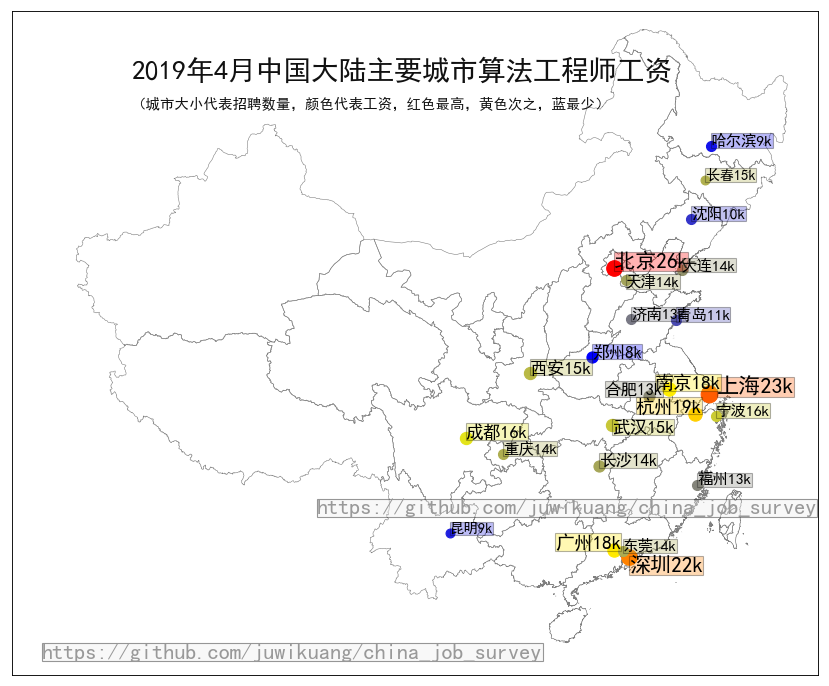

In [16]:
draw_map(data_city_algorithm,100,'2019年4月中国大陆主要城市算法工程师工资')

# 系统架构师

In [17]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'city')
data_city_architect.city=data_city_architect.city.map(translate_dict)
data_city_architect.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,深圳,24135,7000,22500,52500,1989,12.37%
10,北京,23445,5203,22500,48125,1850,11.51%
3,上海,22797,7000,22500,46575,2831,17.61%
8,杭州,22556,5348,22500,40000,877,5.46%
5,南京,19663,6681,17500,41604,609,3.79%
1,成都,18340,5250,17500,40000,645,4.01%
6,广州,17866,5250,17500,41667,2054,12.78%
12,东莞,15243,5242,12500,38227,179,1.11%
4,大连,15104,3097,15000,33472,215,1.34%
0,武汉,15024,5250,13250,30000,814,5.06%


In [18]:
describe(data_city_architect,'系统架构师')

2019年4月深圳招收系统架构师1989人。2019年4月深圳系统架构师平均工资24135元，工资中位数22500元，其中95%的人的工资介于7000元到52500元。

2019年4月北京招收系统架构师1850人。2019年4月北京系统架构师平均工资23445元，工资中位数22500元，其中95%的人的工资介于5203元到48125元。

2019年4月上海招收系统架构师2831人。2019年4月上海系统架构师平均工资22797元，工资中位数22500元，其中95%的人的工资介于7000元到46575元。

2019年4月杭州招收系统架构师877人。2019年4月杭州系统架构师平均工资22556元，工资中位数22500元，其中95%的人的工资介于5348元到40000元。

2019年4月南京招收系统架构师609人。2019年4月南京系统架构师平均工资19663元，工资中位数17500元，其中95%的人的工资介于6681元到41604元。

2019年4月成都招收系统架构师645人。2019年4月成都系统架构师平均工资18340元，工资中位数17500元，其中95%的人的工资介于5250元到40000元。

2019年4月广州招收系统架构师2054人。2019年4月广州系统架构师平均工资17866元，工资中位数17500元，其中95%的人的工资介于5250元到41667元。

2019年4月东莞招收系统架构师179人。2019年4月东莞系统架构师平均工资15243元，工资中位数12500元，其中95%的人的工资介于5242元到38227元。

2019年4月大连招收系统架构师215人。2019年4月大连系统架构师平均工资15104元，工资中位数15000元，其中95%的人的工资介于3097元到33472元。

2019年4月武汉招收系统架构师814人。2019年4月武汉系统架构师平均工资15024元，工资中位数13250元，其中95%的人的工资介于5250元到30000元。

2019年4月重庆招收系统架构师227人。2019年4月重庆系统架构师平均工资15001元，工资中位数15000元，其中95%的人的工资介于6035元到26925元。

2019年4月西安招收系统架构师446人。2019年4月西安系统架构师平均工资14879元，工资中位数12500元，其中9

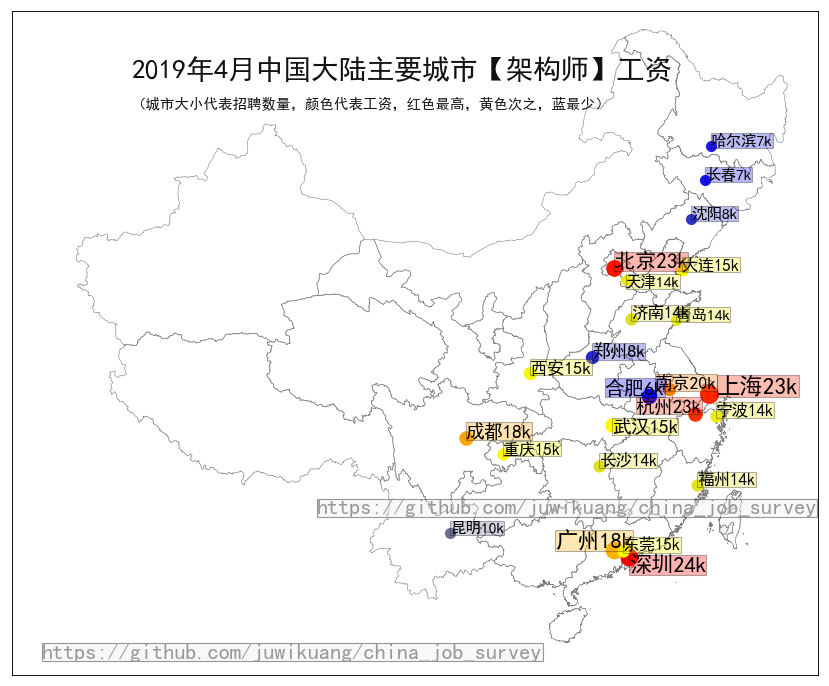

In [19]:
draw_map(data_city_architect,40,'2019年4月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [20]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'city')
data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
7,长春,11500,11500,11500,11500,7,7.22%
3,广州,11375,7000,11375,14000,8,8.25%
2,深圳,10794,4500,11100,22500,34,35.05%
1,上海,10536,7000,10800,17500,23,23.71%
0,杭州,9400,8000,9400,11500,5,5.15%
8,南京,9000,9000,9000,9000,3,3.09%
4,北京,8000,8000,8000,8000,6,6.19%
5,武汉,8000,8000,8000,8000,6,6.19%
6,合肥,7500,7500,7500,7500,5,5.15%


In [21]:
describe(data_bio,'生物信息工程师')

2019年4月长春招收生物信息工程师7人。2019年4月长春生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年4月广州招收生物信息工程师8人。2019年4月广州生物信息工程师平均工资11375元，工资中位数11375元，其中95%的人的工资介于7000元到14000元。

2019年4月深圳招收生物信息工程师34人。2019年4月深圳生物信息工程师平均工资10794元，工资中位数11100元，其中95%的人的工资介于4500元到22500元。

2019年4月上海招收生物信息工程师23人。2019年4月上海生物信息工程师平均工资10536元，工资中位数10800元，其中95%的人的工资介于7000元到17500元。

2019年4月杭州招收生物信息工程师5人。2019年4月杭州生物信息工程师平均工资9400元，工资中位数9400元，其中95%的人的工资介于8000元到11500元。

2019年4月南京招收生物信息工程师3人。2019年4月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。

2019年4月北京招收生物信息工程师6人。2019年4月北京生物信息工程师平均工资8000元，工资中位数8000元，其中95%的人的工资介于8000元到8000元。

2019年4月武汉招收生物信息工程师6人。2019年4月武汉生物信息工程师平均工资8000元，工资中位数8000元，其中95%的人的工资介于8000元到8000元。

2019年4月合肥招收生物信息工程师5人。2019年4月合肥生物信息工程师平均工资7500元，工资中位数7500元，其中95%的人的工资介于7500元到7500元。



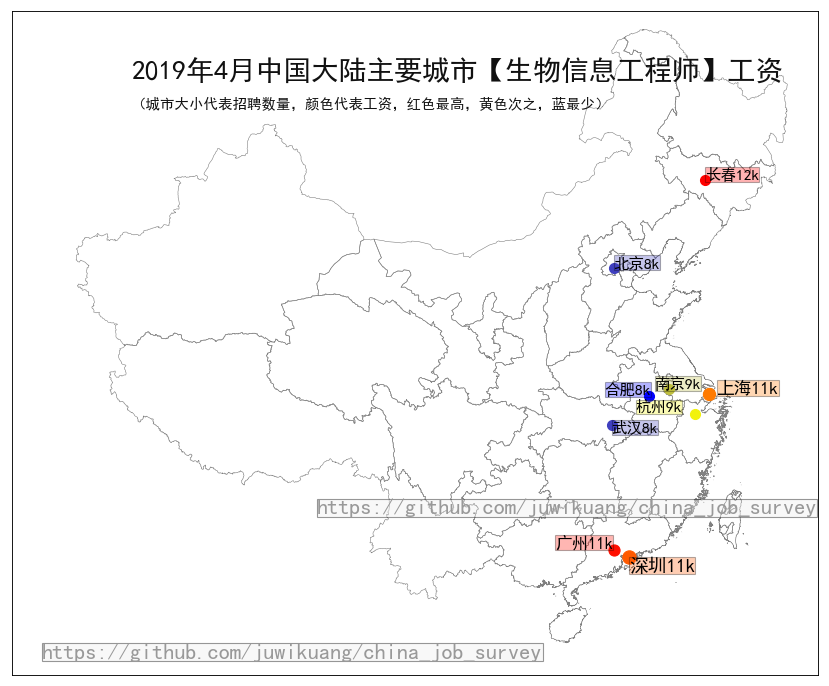

In [22]:
draw_map(data_bio,2,'2019年4月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [23]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'city')

data_spider.city=data_spider.city.map(translate_dict)
data_spider=data_spider[data_spider.head_count>10]
data_spider.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
7,上海,15840,3750,15000,31625,134,21.44%
2,北京,14911,2390,12500,36750,72,11.52%
5,深圳,14613,5250,14000,24267,108,17.28%
0,广州,14429,3906,12500,37500,85,13.60%
6,南京,13936,9000,12500,20000,39,6.24%
8,杭州,13504,3871,12500,24000,44,7.04%
9,成都,11673,2500,11500,22500,49,7.84%
3,武汉,10712,5250,11500,12500,20,3.20%
12,长沙,9125,2500,9000,15000,14,2.24%
11,郑州,7978,5000,6214,12500,23,3.68%


In [24]:
describe(data_spider, '爬虫工程师')

2019年4月上海招收爬虫工程师134人。2019年4月上海爬虫工程师平均工资15840元，工资中位数15000元，其中95%的人的工资介于3750元到31625元。

2019年4月北京招收爬虫工程师72人。2019年4月北京爬虫工程师平均工资14911元，工资中位数12500元，其中95%的人的工资介于2390元到36750元。

2019年4月深圳招收爬虫工程师108人。2019年4月深圳爬虫工程师平均工资14613元，工资中位数14000元，其中95%的人的工资介于5250元到24267元。

2019年4月广州招收爬虫工程师85人。2019年4月广州爬虫工程师平均工资14429元，工资中位数12500元，其中95%的人的工资介于3906元到37500元。

2019年4月南京招收爬虫工程师39人。2019年4月南京爬虫工程师平均工资13936元，工资中位数12500元，其中95%的人的工资介于9000元到20000元。

2019年4月杭州招收爬虫工程师44人。2019年4月杭州爬虫工程师平均工资13504元，工资中位数12500元，其中95%的人的工资介于3871元到24000元。

2019年4月成都招收爬虫工程师49人。2019年4月成都爬虫工程师平均工资11673元，工资中位数11500元，其中95%的人的工资介于2500元到22500元。

2019年4月武汉招收爬虫工程师20人。2019年4月武汉爬虫工程师平均工资10712元，工资中位数11500元，其中95%的人的工资介于5250元到12500元。

2019年4月长沙招收爬虫工程师14人。2019年4月长沙爬虫工程师平均工资9125元，工资中位数9000元，其中95%的人的工资介于2500元到15000元。

2019年4月郑州招收爬虫工程师23人。2019年4月郑州爬虫工程师平均工资7978元，工资中位数6214元，其中95%的人的工资介于5000元到12500元。



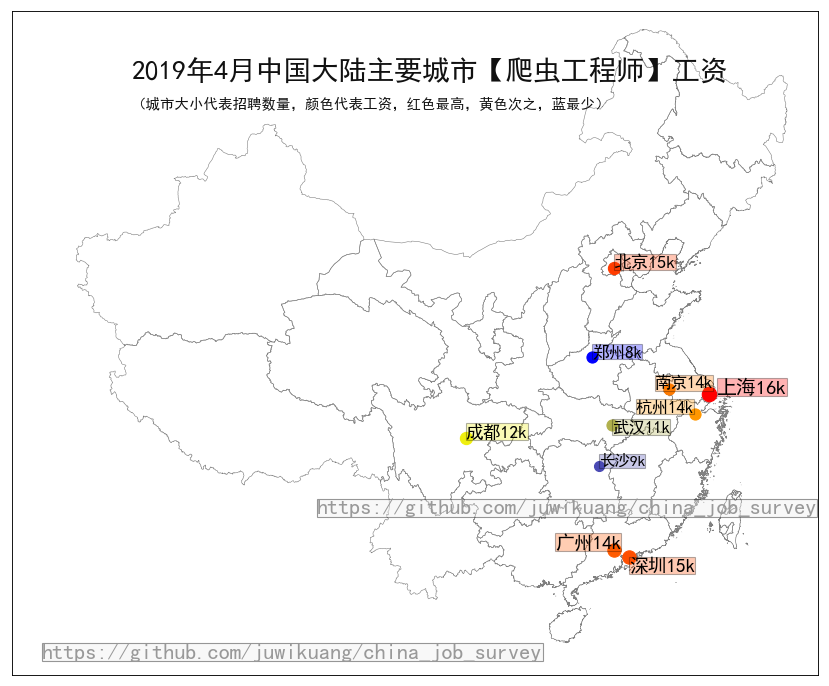

In [25]:
draw_map(data_spider,5,'2019年4月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [26]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.city=data_java.city.map(translate_dict)
data_java.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
1,上海,16180,5250,15000,35000,25258,16.22%
9,深圳,16171,5500,15000,37500,18669,11.99%
4,北京,16111,2500,13290,40000,17674,11.35%
2,杭州,15090,3750,13000,32500,8950,5.75%
3,广州,13112,3750,12500,29167,17481,11.22%
21,东莞,12843,4500,11500,27040,1221,0.78%
5,成都,12483,3500,11500,27500,6813,4.37%
11,天津,12376,4942,10500,30000,1585,1.02%
6,南京,12332,3750,11632,27500,10389,6.67%
22,宁波,11302,3750,10417,25776,1472,0.95%


In [27]:
describe(data_java, 'Java程序员')

2019年4月上海招收Java程序员25258人。2019年4月上海Java程序员平均工资16180元，工资中位数15000元，其中95%的人的工资介于5250元到35000元。

2019年4月深圳招收Java程序员18669人。2019年4月深圳Java程序员平均工资16171元，工资中位数15000元，其中95%的人的工资介于5500元到37500元。

2019年4月北京招收Java程序员17674人。2019年4月北京Java程序员平均工资16111元，工资中位数13290元，其中95%的人的工资介于2500元到40000元。

2019年4月杭州招收Java程序员8950人。2019年4月杭州Java程序员平均工资15090元，工资中位数13000元，其中95%的人的工资介于3750元到32500元。

2019年4月广州招收Java程序员17481人。2019年4月广州Java程序员平均工资13112元，工资中位数12500元，其中95%的人的工资介于3750元到29167元。

2019年4月东莞招收Java程序员1221人。2019年4月东莞Java程序员平均工资12843元，工资中位数11500元，其中95%的人的工资介于4500元到27040元。

2019年4月成都招收Java程序员6813人。2019年4月成都Java程序员平均工资12483元，工资中位数11500元，其中95%的人的工资介于3500元到27500元。

2019年4月天津招收Java程序员1585人。2019年4月天津Java程序员平均工资12376元，工资中位数10500元，其中95%的人的工资介于4942元到30000元。

2019年4月南京招收Java程序员10389人。2019年4月南京Java程序员平均工资12332元，工资中位数11632元，其中95%的人的工资介于3750元到27500元。

2019年4月宁波招收Java程序员1472人。2019年4月宁波Java程序员平均工资11302元，工资中位数10417元，其中95%的人的工资介于3750元到25776元。

2019年4月西安招收Java程序员5217人。2019年4月西安Java程序员平均工资11241元，工资中位数10000元，其中95%的人的工资介于3750元到27500元。

2019年

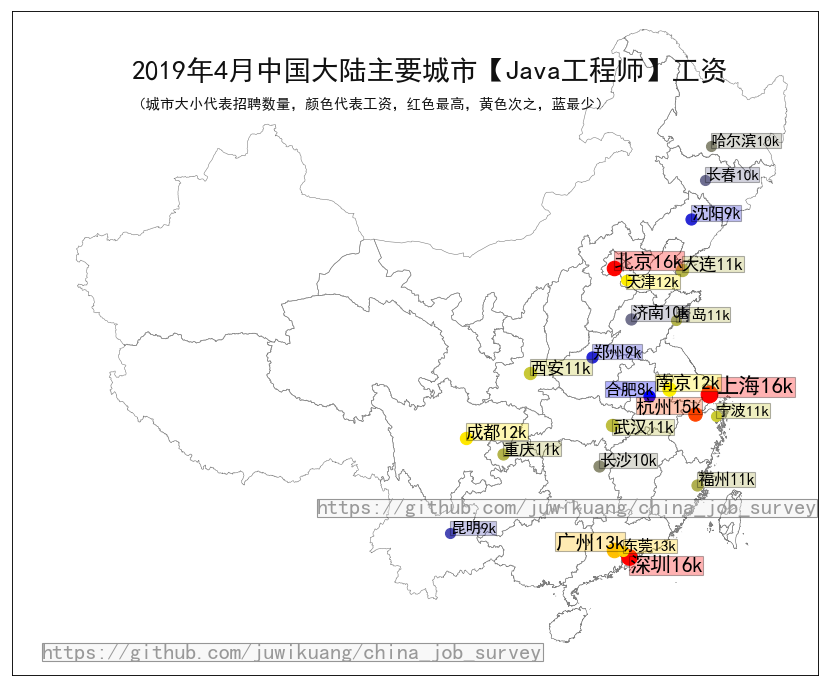

In [28]:
draw_map(data_java, 500, '2019年4月中国大陆主要城市【Java工程师】工资')

# Python程序员

In [29]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'city')
data_python.city=data_python.city.map(translate_dict)
data_python.style.format(data_format)

,city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
0,北京,21843,4000,19500,50000,5845,16.54%
4,上海,20709,5446,20000,45000,7154,20.24%
8,深圳,20078,5050,17500,45000,4584,12.97%
5,杭州,17656,2500,15000,40000,2185,6.18%
6,天津,16169,6625,15000,30000,285,0.81%
2,广州,15921,3750,14000,37500,3487,9.87%
12,南京,15557,3000,15000,30000,2208,6.25%
3,大连,15407,3750,13550,30765,718,2.03%
9,成都,15084,3750,12900,31250,1963,5.55%
16,福州,14946,4600,12500,31355,504,1.43%


In [30]:
describe(data_python, 'Python程序员')

2019年4月北京招收Python程序员5845人。2019年4月北京Python程序员平均工资21843元，工资中位数19500元，其中95%的人的工资介于4000元到50000元。

2019年4月上海招收Python程序员7154人。2019年4月上海Python程序员平均工资20709元，工资中位数20000元，其中95%的人的工资介于5446元到45000元。

2019年4月深圳招收Python程序员4584人。2019年4月深圳Python程序员平均工资20078元，工资中位数17500元，其中95%的人的工资介于5050元到45000元。

2019年4月杭州招收Python程序员2185人。2019年4月杭州Python程序员平均工资17656元，工资中位数15000元，其中95%的人的工资介于2500元到40000元。

2019年4月天津招收Python程序员285人。2019年4月天津Python程序员平均工资16169元，工资中位数15000元，其中95%的人的工资介于6625元到30000元。

2019年4月广州招收Python程序员3487人。2019年4月广州Python程序员平均工资15921元，工资中位数14000元，其中95%的人的工资介于3750元到37500元。

2019年4月南京招收Python程序员2208人。2019年4月南京Python程序员平均工资15557元，工资中位数15000元，其中95%的人的工资介于3000元到30000元。

2019年4月大连招收Python程序员718人。2019年4月大连Python程序员平均工资15407元，工资中位数13550元，其中95%的人的工资介于3750元到30765元。

2019年4月成都招收Python程序员1963人。2019年4月成都Python程序员平均工资15084元，工资中位数12900元，其中95%的人的工资介于3750元到31250元。

2019年4月福州招收Python程序员504人。2019年4月福州Python程序员平均工资14946元，工资中位数12500元，其中95%的人的工资介于4600元到31355元。

2019年4月青岛招收Python程序员236人。2019年4月青岛Python程序员平均工资14863元，工资中位数1200

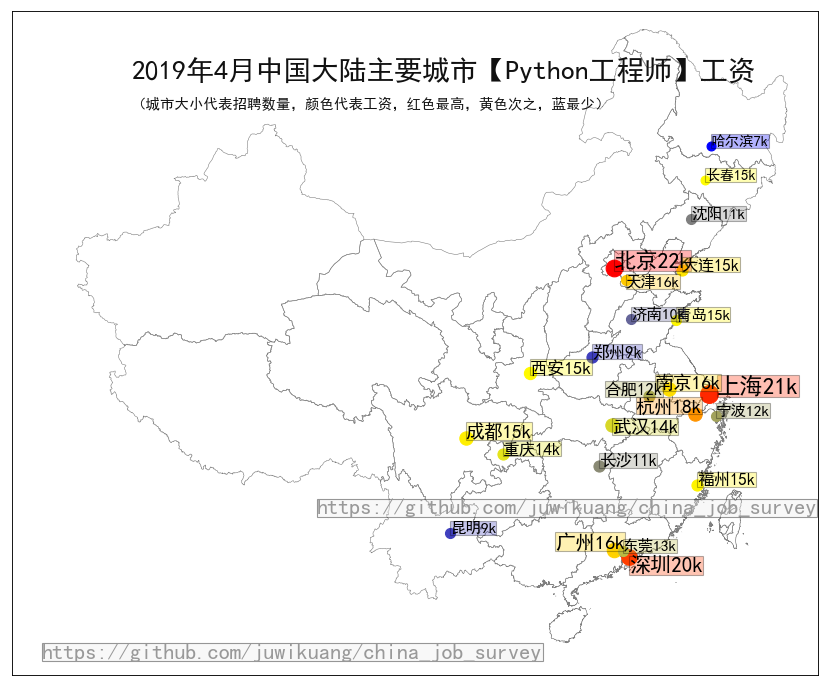

In [31]:
draw_map(data_python, 100,  '2019年4月中国大陆主要城市【Python工程师】工资')